In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [46]:
def correct(df_raw):
    """Erreur sur les données de septembre en Essonne"""
    df_ess = df_raw[df_raw['dep']=='91'].reset_index().set_index('jour')
    idxmax = df_ess['incid_hosp'].idxmax()
    # Hosp
    df_ess.loc[:idxmax, 'incid_hosp'] += 1
    df_ess.loc[idxmax, 'incid_hosp'] -= len(df_ess[:idxmax])
    reste = df_ess['incid_hosp'][idxmax] - 27
    df_ess.loc[:idxmax, 'incid_hosp'].iloc[-reste:] += 1
    df_ess.loc[idxmax, 'incid_hosp'] -= len(df_ess[:idxmax][-reste:])
    # Dc
    reste = df_ess['incid_dc'][idxmax] - 1
    df_ess.loc[:idxmax, 'incid_dc'].iloc[-reste:] += 1
    df_ess.loc[idxmax, 'incid_dc'] -= len(df_ess[:idxmax][-reste:])
    df_raw.loc[df_raw['dep']=='91'] = df_ess.reset_index().set_index('index')
    return df_raw

In [45]:
url = "https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c"
df_raw = pd.read_csv(url, sep=';', parse_dates=['jour'])
df_raw = correct(df_raw)
df = df_raw.groupby('jour').sum()
df['pos_semaine'] = df.index.weekday
if df['pos_semaine'].iloc[-1] < 5:
    df_util = df[df['pos_semaine']<5].resample('W').mean()
else:
    df_util = df.resample('W').mean()

In [43]:
(df_util.diff() / df_util.shift(1)).tail(5)

,incid_hosp,incid_rea,incid_dc,incid_rad,pos_semaine
jour,,,,,
2020-10-04,-0.042197,0.075385,0.153846,0.010883,0.0
2020-10-11,0.172903,0.040057,0.123810,0.057971,0.0
2020-10-18,0.468742,0.404402,0.403955,0.290802,0.0
2020-10-25,0.613242,0.363369,0.657948,0.257429,0.0
2020-11-01,0.443322,0.420259,0.577670,0.466120,0.0


In [ ]:
def get_df_dept(df_raw, departements: list=None):
    df_raw_dept = df_raw[df_raw['dep'].isin(departements)]
    df_dept = df_raw_dept.groupby('jour').sum()
    df_dept['pos_semaine'] = df_dept.index.weekday
    df_dept = df_dept[df_dept['pos_semaine']<5].resample('W').mean()

In [39]:
idf = df_raw[(df_raw['dep']=='75')|(df_raw['dep']=='77')|(df_raw['dep']=='78')|(df_raw['dep']=='91')|(df_raw['dep']=='92')|(df_raw['dep']=='93')|(df_raw['dep']=='94')|(df_raw['dep']=='95')]
idf = idf.groupby('jour').sum()
idf['pos_semaine'] = idf.index.weekday
idf_util = idf[idf['pos_semaine']<5].resample('W').mean()
#idf_util = idf.resample('W').mean()

In [13]:
als = df_raw[(df_raw['dep']=='67')|(df_raw['dep']=='68')]
als = als.groupby('jour').sum()
als['pos_semaine'] = als.index.weekday
als_util = als[als['pos_semaine']<5].resample('W').mean()
#als_util = als.resample('W').mean()

In [14]:
df_util['incid_dc'].idxmax()

Timestamp('2020-04-12 00:00:00', freq='W-SUN')

In [15]:
df_util['incid_dc'].max()

556.8

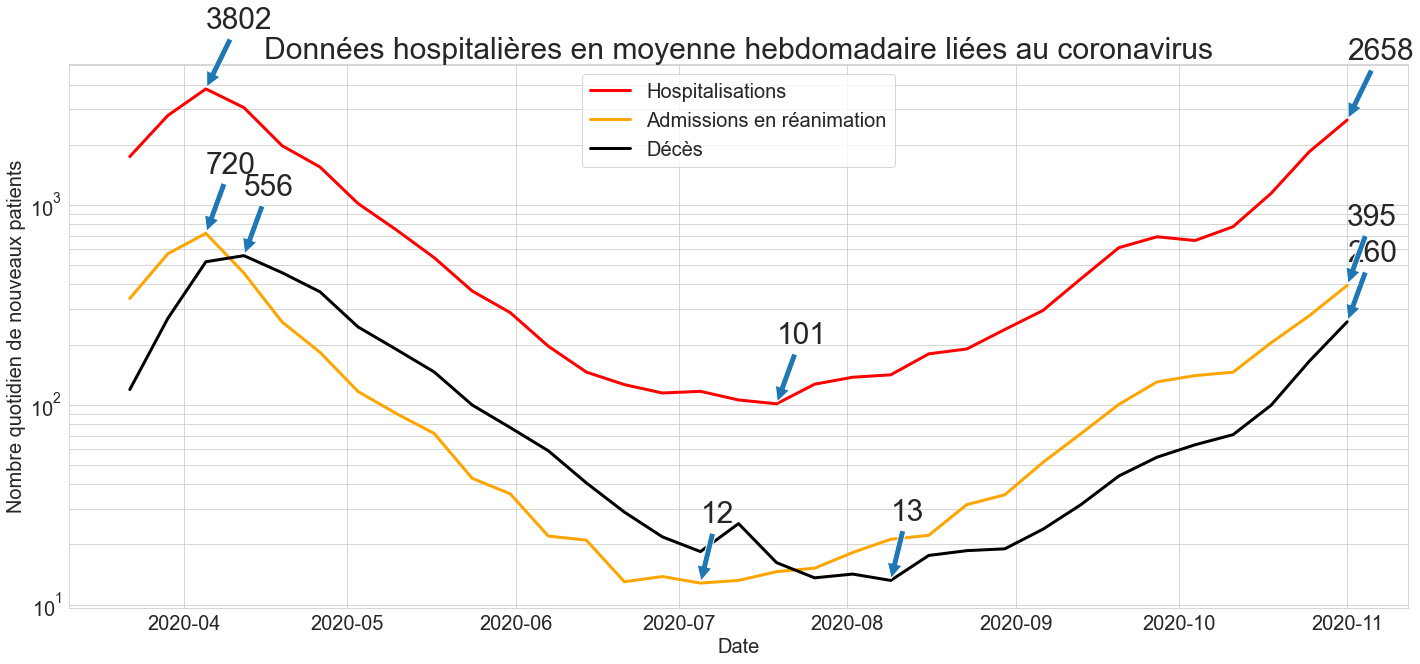

In [23]:
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")
sns.lineplot(data=df_util['incid_hosp'], linewidth=3, dashes=False, color='red', label='Hospitalisations')
sns.lineplot(data=df_util['incid_rea'], linewidth=3, dashes=False, color='orange', label='Admissions en réanimation')
sns.lineplot(data=df_util['incid_dc'], linewidth=3, dashes=False, color='black', label='Décès')
plt.title("Données hospitalières en moyenne hebdomadaire liées au coronavirus", {'fontsize': 30})
plt.legend(fontsize=20, loc='upper center')
plt.yscale('log')
plt.grid(which='minor', axis='y')
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)

def annote(df, col):
    x_max = df[col].idxmax()
    y_max = df[col].max()
    plt.annotate(str(int(y_max)), (x_max, y_max), xytext=(x_max, y_max*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
    x_min = df[col].idxmin()
    y_min = df[col].min()
    plt.annotate(str(int(y_min)), (x_min, y_min), xytext=(x_min, y_min*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
    x_last = df.index[-1]
    y_last = df[col].iloc[-1]
    plt.annotate(str(int(y_last)), (x_last, y_last), xytext=(x_last, y_last*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)

for col in ['incid_dc', 'incid_rea', 'incid_hosp']:
    annote(df_util, col)

plt.xlabel('Date', {'fontsize': 20})
plt.ylabel('Nombre quotidien de nouveaux patients', {'fontsize': 20})
plt.savefig('complet.png')

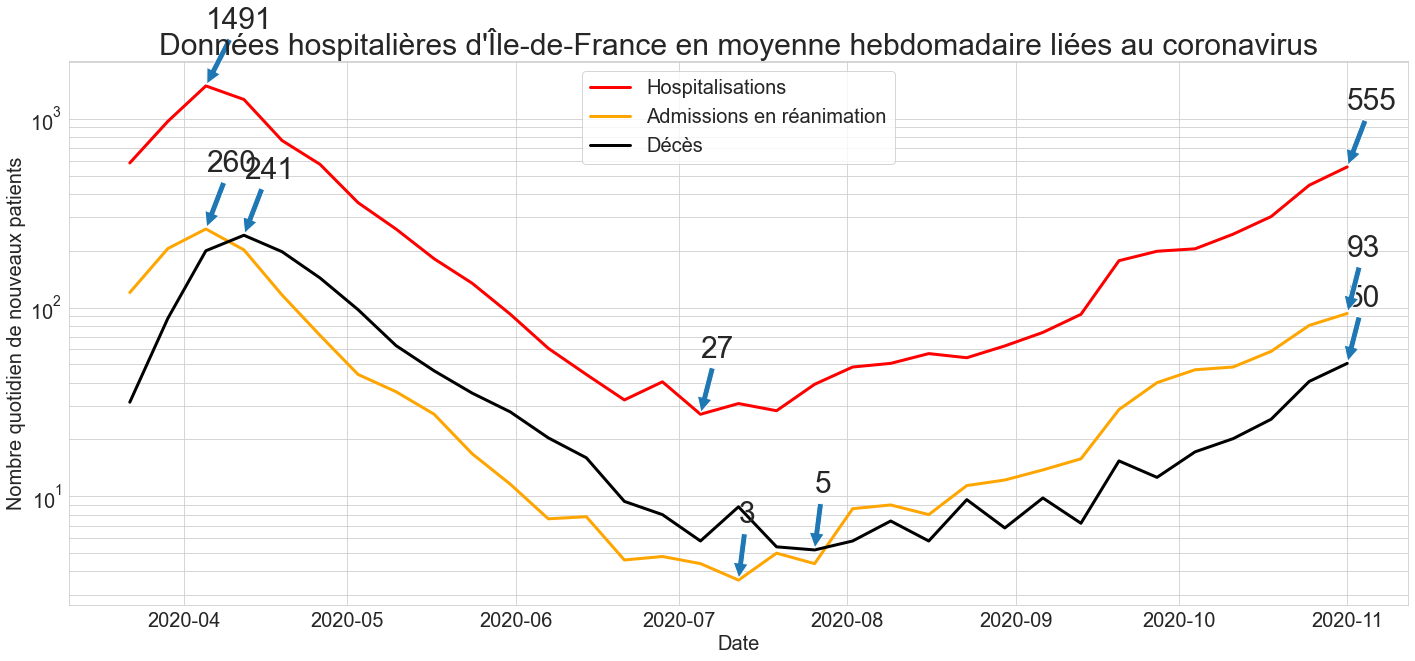

In [17]:
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")
sns.lineplot(data=idf_util['incid_hosp'], linewidth=3, dashes=False, color='red', label='Hospitalisations')
sns.lineplot(data=idf_util['incid_rea'], linewidth=3, dashes=False, color='orange', label='Admissions en réanimation')
sns.lineplot(data=idf_util['incid_dc'], linewidth=3, dashes=False, color='black', label='Décès')
plt.title("Données hospitalières d'Île-de-France en moyenne hebdomadaire liées au coronavirus", {'fontsize': 30})
plt.legend(fontsize=20, loc='upper center')
plt.yscale('log')
plt.grid(which='minor', axis='y')
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)

def annote(df, col):
    x_max = df[col].idxmax()
    y_max = df[col].max()
    plt.annotate(str(int(y_max)), (x_max, y_max), xytext=(x_max, y_max*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
    x_min = df[col].idxmin()
    y_min = df[col].min()
    plt.annotate(str(int(y_min)), (x_min, y_min), xytext=(x_min, y_min*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
    x_last = df.index[-1]
    y_last = df[col].iloc[-1]
    plt.annotate(str(int(y_last)), (x_last, y_last), xytext=(x_last, y_last*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)

for col in ['incid_dc', 'incid_rea', 'incid_hosp']:
    annote(idf_util, col)

plt.xlabel('Date', {'fontsize': 20})
plt.ylabel('Nombre quotidien de nouveaux patients', {'fontsize': 20})
plt.show()

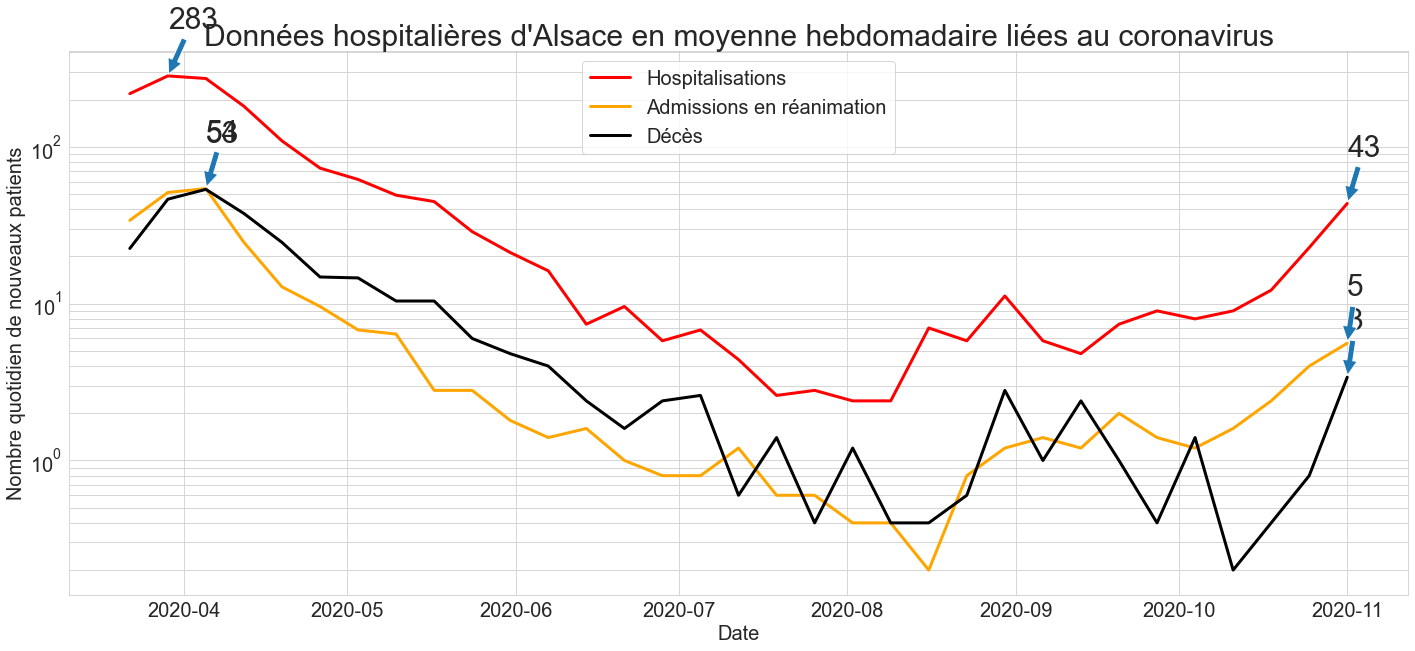

In [18]:
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")
sns.lineplot(data=als_util['incid_hosp'], linewidth=3, dashes=False, color='red', label='Hospitalisations')
sns.lineplot(data=als_util['incid_rea'], linewidth=3, dashes=False, color='orange', label='Admissions en réanimation')
sns.lineplot(data=als_util['incid_dc'], linewidth=3, dashes=False, color='black', label='Décès')
plt.title("Données hospitalières d'Alsace en moyenne hebdomadaire liées au coronavirus", {'fontsize': 30})
plt.legend(fontsize=20, loc='upper center')
plt.yscale('log')
plt.grid(which='minor', axis='y')
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)

def annote(df, col):
    x_max = df.loc[:'2020-08', col].idxmax()
    y_max = df.loc[:'2020-08', col].max()
    plt.annotate(str(int(y_max)), (x_max, y_max), xytext=(x_max, y_max*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
    """x_min = df[col].idxmin()
    y_min = df[col].min()
    plt.annotate(str(int(y_min)), (x_min, y_min), xytext=(x_min, y_min*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)"""
    x_last = df.index[-1]
    y_last = df[col].iloc[-1]
    plt.annotate(str(int(y_last)), (x_last, y_last), xytext=(x_last, y_last*2), arrowprops={'arrowstyle': 'simple'}, fontsize=30)

for col in ['incid_dc', 'incid_rea', 'incid_hosp']:
    annote(als_util, col)

plt.xlabel('Date', {'fontsize': 20})
plt.ylabel('Nombre quotidien de nouveaux patients', {'fontsize': 20})
plt.show()

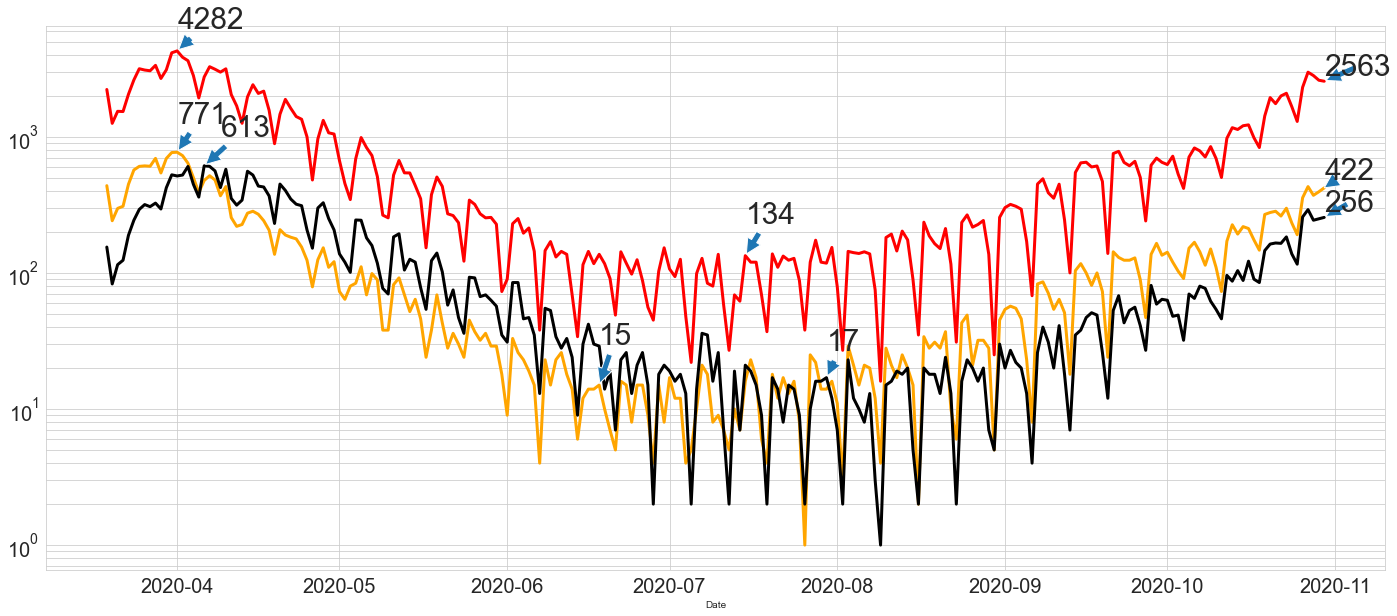

In [24]:
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")
sns.lineplot(data=df['incid_hosp'], linewidth=3, dashes=False, color='red')
sns.lineplot(data=df['incid_rea'], linewidth=3, dashes=False, color='orange')
sns.lineplot(data=df['incid_dc'], linewidth=3, dashes=False, color='black')
plt.yscale('log')
plt.grid(which='minor', axis='y')
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)
plt.annotate(str(df['incid_dc'].iloc[18]), (df.index[18], df['incid_dc'].iloc[18]), xytext=(df.index[21], df['incid_dc'].iloc[18]+400), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_dc'].iloc[133]), (df.index[133], df['incid_dc'].iloc[133]), xytext=(df.index[133], df['incid_dc'].iloc[133]+10), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_dc'].iloc[-1]), (df.index[-1], df['incid_dc'].iloc[-1]), xytext=(df.index[-1], df['incid_dc'].iloc[-1]+30), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_hosp'].iloc[13]), (df.index[13], df['incid_hosp'].iloc[13]), xytext=(df.index[13], df['incid_hosp'].iloc[13]+2000), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_hosp'].iloc[118]), (df.index[118], df['incid_hosp'].iloc[118]), xytext=(df.index[118], df['incid_hosp'].iloc[118]+100), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_hosp'].iloc[-1]), (df.index[-1], df['incid_hosp'].iloc[-1]), xytext=(df.index[-1], df['incid_hosp'].iloc[-1]+300), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_rea'].iloc[13]), (df.index[13], df['incid_rea'].iloc[13]), xytext=(df.index[13], df['incid_rea'].iloc[13]+500), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_rea'].iloc[91]), (df.index[91], df['incid_rea'].iloc[91]), xytext=(df.index[91], df['incid_rea'].iloc[91]+15), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.annotate(str(df['incid_rea'].iloc[-1]), (df.index[-1], df['incid_rea'].iloc[-1]), xytext=(df.index[-1], df['incid_rea'].iloc[-1]+70), arrowprops={'arrowstyle': 'simple'}, fontsize=30)
plt.xlabel('Date')
plt.show()

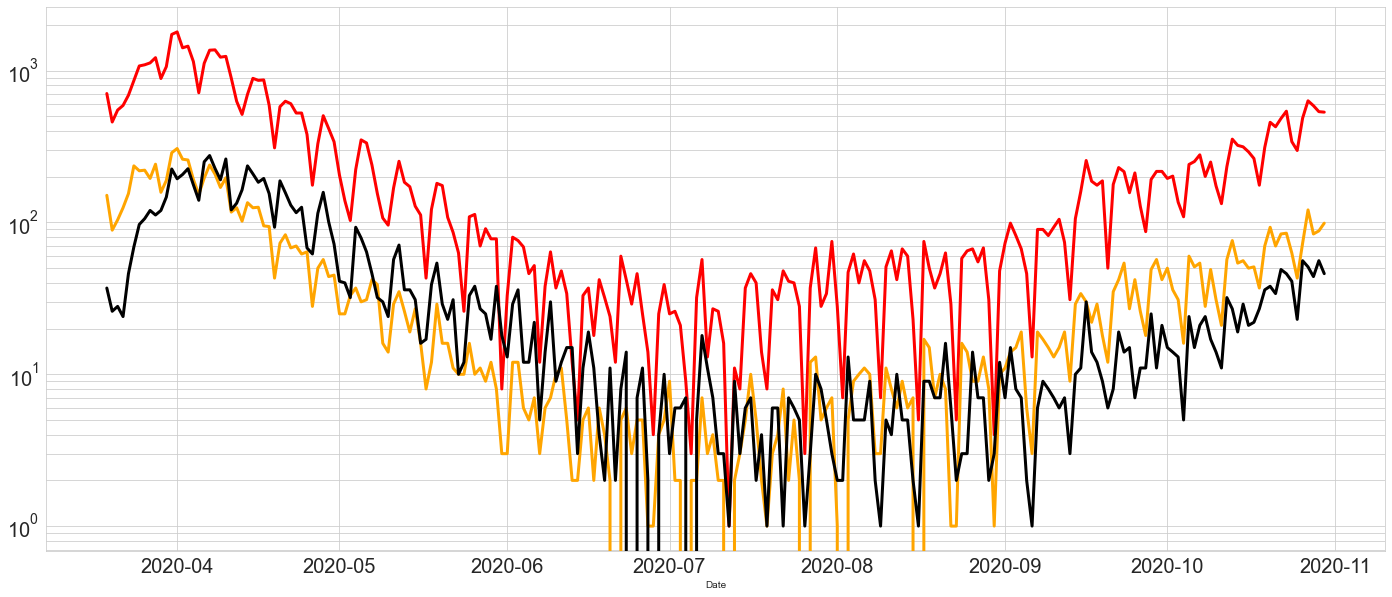

In [40]:
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")
sns.lineplot(data=idf['incid_hosp'], linewidth=3, dashes=False, color='red')
sns.lineplot(data=idf['incid_rea'], linewidth=3, dashes=False, color='orange')
sns.lineplot(data=idf['incid_dc'], linewidth=3, dashes=False, color='black')
plt.yscale('log')
plt.grid(which='minor', axis='y')
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)
plt.xlabel('Date')
plt.show()